# ICS A1: SDES

In [1094]:
import random

In [1095]:
P10=[]
P8=[]
IP=[] #size = 8
EP=[] #size = 8
INV_IP=[]

In [1096]:
def generate_rand_permutation(n):
    out = [i+1 for i in range(n)]
    random.shuffle(out)
    return out

In [1097]:
IP = generate_rand_permutation(8)
INV_IP = [1]*8
for i in range(8):
    INV_IP[IP[i]-1]=i+1
    
print('IP: ',IP)
print('INV_IP: ',INV_IP)

IP:  [5, 3, 8, 7, 2, 1, 6, 4]
INV_IP:  [6, 5, 2, 8, 1, 7, 4, 3]


In [1098]:
EP = generate_rand_permutation(4)*2
EP

[3, 4, 1, 2, 3, 4, 1, 2]

In [1099]:
P10 = generate_rand_permutation(10)
P10

[4, 10, 5, 2, 7, 3, 6, 1, 9, 8]

In [1100]:
P8 = random.sample(generate_rand_permutation(10),8)
P8

[2, 8, 10, 1, 9, 5, 4, 6]

In [1101]:
S0 = [
    [1, 0, 3, 2],
    [3, 2, 1, 0],
    [0, 2, 1, 3],
    [3, 1, 3, 2]
]
S1 = [
    [0, 1, 2, 3],
    [2, 0, 1, 3],
    [3, 0, 1, 0],
    [2, 1, 0, 3]
]

In [1102]:
def bin_to_dec(n):
    return int(n,2)
def dec_to_bin(n):
    return bin(n).replace("0b","")

In [1103]:
def left_circular_shift(a,shift=1):
    shift = shift%len(a)
    a = a[shift:]+a[:shift]
    return a

In [1104]:
def permutate(a,P):
    ret=""
    for k in P:
        ret += a[k-1]
    return ret

In [1105]:
def split_key(key):
    mid = len(key)//2
    left = key[:mid]
    right = key[mid:]
    return left,right

In [1106]:
def xor(a,b):
    ret=""
    for i in range(len(a)):
        if a[i]==b[i]:
            ret += "0"
        else:
            ret += "1"
    return ret

## FUNCTIONS MAIN###

In [1107]:
def gen_subkeys(key):
    #P10(key)
    #split left right
    # 1LS
    #P8
    #k1
    #1LS k bad 2LS
    #P8
    #k2
    n_key = permutate(key,P10)
    left,right = split_key(n_key)
    
    left = left_circular_shift(left,1)
    right = left_circular_shift(right,1)
    key1 = permutate(left+right,P8)
    
    left = left_circular_shift(left,2)
    right = left_circular_shift(right,2)
    key2 = permutate(left+right,P8)
    
    return key1,key2

In [1108]:
k1,k2 = gen_subkeys("1010001011");
print(k1," ",k2)

01110010   11100011


In [1109]:
def s_box(text,s):
    r = text[0]+text[3]
    c = text[1]+text[2]
    r = bin_to_dec(r)
    c = bin_to_dec(c)
    val = s[r][c]
    val = dec_to_bin(c)
    while len(val)<2:
        val = '0'+val
    return val

In [1110]:
def function(left,right,subKey):
    text = right #size 4
    text = permutate(text,EP) #size 8 (bcoz of EP-Expanded Permutation)
    text = xor(text,subKey) #size 8
    text_left,text_right = split_key(text)
    text = s_box(text_left,S0)+s_box(text_right,S1) #size of text = 2+2 = 4
    text = xor(text,left)
    return text,right

In [1111]:
def encrypt(PT,key):
    k1,k2 = gen_subkeys(key)
    PT = permutate(PT,IP)
    leftP,rightP = split_key(PT)
    
    #Round1
    leftP,rightP = function(leftP,rightP,k1)
    #swap
    leftP,rightP = rightP,leftP
    #Round2
    leftP,rightP = function(leftP,rightP,k2)
    
    CT = permutate(leftP+rightP,INV_IP)
    return CT
    
    

In [1112]:
def decrypt(CT,key):
    k1,k2 = gen_subkeys(key)
    CT = permutate(CT,IP)
    leftP,rightP = split_key(CT)
    
    #Round1
    leftP,rightP = function(leftP,rightP,k2)
    #swap
    leftP,rightP = rightP,leftP
    #Round2
    leftP,rightP = function(leftP,rightP,k1)
    
    PT = permutate(leftP+rightP,INV_IP)
    return PT

In [1113]:
key = "1010000010"
plaintext = "01110010"

In [1114]:
c=encrypt(plaintext,key)
p=decrypt(c,key)
print(c,p)

10100110 01110010


# ICS A3 - Diffie Hellman

In [1115]:
#global variables
P=23
G=14

In [1116]:
#private keys
a=3
b=4

In [1117]:
Ka = pow(G,a)%P
Kb = pow(G,b)%P
print(Ka,Kb)

7 6


In [1118]:
PKa = pow(Kb,a)%P
PKb = pow(Ka,b)%P

In [1119]:
print(PKa," ",PKb)

9   9


# ICS A4 RSA Algorithm

In [1120]:
#gloabl 2 big prime numbers
P=53
Q=59

In [1121]:
n=P*Q
phi_n=(P-1)*(Q-1)

In [1122]:
def gcd(a,b):
    if(a==0):
        return b
    return gcd(b%a,a)

In [1123]:
#find e
e =2
while(e<phi_n):
    if(gcd(e,phi_n)==1):
        break
    e += 1
e

3

In [1124]:
#find d
k=1
while (k*phi_n+1)%e !=0:
    k +=1
d = (k*phi_n+1)//e
d

2011

In [1125]:
public_key=[e,n]
private_key=[d,n]

In [1126]:
def mod_pow(a, b, m):
  if b==0:
    return 1
  r = mod_pow(a, b//2, m)
  r = (r * r) % m
  if b % 2 == 1:
    r = (r * a) % m
  return r

In [1127]:
def encrypt(PT,public_key):
    e,n = public_key
    return mod_pow(PT,e,n)

In [1128]:
def decrypt(CT,private_key):
    d,n = private_key
    return mod_pow(CT,d,n)

In [1129]:
plaintext = 89
c = encrypt(plaintext,public_key )
p = decrypt(c, private_key)
print(p,c)

89 1394


# ICS A5 ECC

In [1130]:
class Point:
    def __init__(self,x,y):
        self.x = round(x,2)
        self.y = round(y,2)
    def __eq__(self, p2):
        return self.x == p2.x and self.y == p2.y
    def __str__(self) -> str:
      return f"({self.x}, {self.y})"

In [1131]:
class ECC:
    def __init__(self,a,b):
        self.a = a
        self.b = b
    def add(self,p1,p2,m=P):
        l=0
        if(p1==p2):
            num = 3*p1.x*p1.x+self.a
            den = 2*p1.y
        else:
            num = p2.y-p1.y
            den = p2.x-p1.x
        l = num/den
        x3 = l*l-p1.x-p2.x
        y3 = l*(p1.x-x3)-p1.y
        return Point(x3,y3)
    
    def mul(self,k,p):
        temp = p
        while k!=1:
            temp = self.add(temp,p)
            k-=1
        return temp
    
    def sub(self,p1,p2):
        np = Point(p2.x,-p2.y)
        return self.add(p1,np)

In [1132]:
curve = ECC(2, 4) # Points lying on this curve:{0, 2}, {0, 5}, {1, 0}, {2, 3}, {2, 4}, {3, 3}, {3, 4}, {6, 1}, {6, 6}
G = Point(0, 2)

In [1133]:
def encrypt(Pm,U):
    k=5
    CT=[
        curve.mul(k,G),
        curve.add(Pm,curve.mul(k,U))
    ]
    return CT

In [1134]:
def decrypt(C,R):
    return curve.sub(C[1],curve.mul(R,C[0]))

In [1135]:
R = 5 # Private key
U = curve.mul(R, G) # Public key

In [1136]:
plaintext = Point(6, 1)

In [1137]:
ciphertext = encrypt(plaintext, U)
p = decrypt(ciphertext, R)
print(p)

(6.0, 1.0)


# ML A1 Linear Regression

In [1138]:


data = [
        (10, 95),
        (9, 80),
        (2, 10),
        (15, 50),
        (10, 45),
        (16, 98),
        (11, 38),
        (16, 93),
]

In [1139]:

#lR
#CC


import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(8,8)})

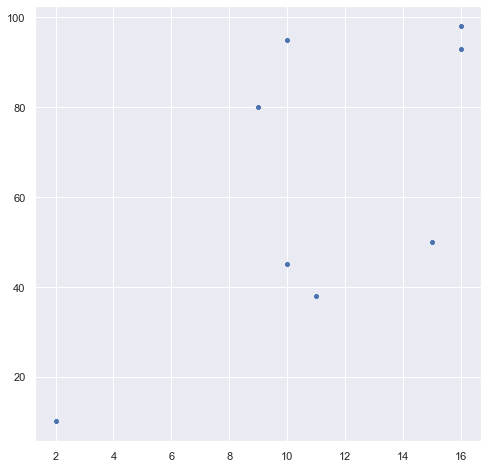

In [1140]:
x = [pt[0] for pt in data]
y = [pt[1] for pt in data]

sns.scatterplot(x=x,y=y)

In [1141]:
x_mean = np.mean(x)
y_mean = np.mean(y)
num = sum((x-x_mean)*(y-y_mean))
deno = (sum((x-x_mean)**2)*sum((y-y_mean)**2))**0.5
print(num," ",deno)
print(num/deno)

701.375   1060.8706992961017
0.6611314653759117


In [1142]:
m = num/sum((x-x_mean)**2)
m

4.58789860997547

In [1143]:
c = y_mean - m*x_mean
c

12.584627964022893

In [1144]:
y_pred=[]
for d in data:
    y_pred.append(m*d[0]+c);
print(y_pred)


[58.46361406377759, 53.87571545380212, 21.760425183973833, 81.40310711365495, 58.46361406377759, 85.99100572363042, 63.05151267375307, 85.99100572363042]


In [1145]:
#def plotRegressionLine

# ML A2: KNN

In [1146]:
class KNN:
    def __init__(self,k):
        self.k=k
        self.X=[]
        self.y=[]
        
    def fit(self,X,y):
        self.X = self.X+X
        self.y = self.y+y
        
    def distance(self,p1,p2):
        return (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2
    
    def predict(self,x):
        distances=[]
        for i in range(len(self.X)):
            distances.append((self.distance(x,self.X[i]),y[i]))
        distances.sort()
        distances = distances[:self.k]
        count = {}
        
        for d in distances:
            try: count[d[1]]+=1
            except: count[d[1]]=1
        mx = max(count,key=lambda i:count[i])
        return mx
    
    def predictWeighted(self,x):
        distances=[]
        for i in range(len(self.X)):
            distances.append((self.distance(x,self.X[i]),y[i]))
        distances.sort()
        distances = distances[:self.k]
        count = {}
        
        for d in distances:
            try: count[d[1]]+=1/d[0]
            except: count[d[1]]=1/d[0]
        mx = max(count,key=lambda i:count[i])
        return mx
    
    def predictWeightedAverage(self,x):
        distances=[]
        for i in range(len(self.X)):
            distances.append((self.distance(x,self.X[i]),y[i]))
        distances.sort()
        distances = distances[:self.k]
        count = {}
        
        for d in distances:
            try: count[d[1]].append(1/d[0])
            except: count[d[1]]=1/d[0]
                
        for c in count:
            count[c] = np.mean(count[c])
            
        mx = max(count,key=lambda i:count[i])
        return mx
        

In [1147]:
model = KNN(3)

In [1148]:
X = [
     (2, 4),
     (4, 6),
     (4, 4),
     (4, 2),
     (6, 4),
     (6 ,2)
]
y = ['Y', 'Y', 'B', 'Y', 'Y', 'B']

In [1149]:
model.fit(X,y)

In [1150]:
x=(6,6)
predicted=model.predict(x)
print('predicted for(6,6)',predicted)
predicted_weighted=model.predictWeighted(x)
print('predicted_weighted for(6,6)',predicted_weighted)
predictedlocaly_average_weighted=model.predictWeightedAverage(x)
print('predicted_weighted for(6,6)',predicted_weighted)


predicted for(6,6) Y
predicted_weighted for(6,6) Y
predicted_weighted for(6,6) Y


# ML A3: K means

In [1168]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(rc={'figure.figsize':(7, 7)})

In [1169]:
def dist(p1,p2):
    return (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2

In [1170]:
def getPointsWithClusterID(points,centroids):
    pointsWithClusterId = [-1]*len(points)
    for i in range(len(points)):
        min_arr=[]
        for j in range(len(centroids)):
            min_arr.append((dist(points[i],centroids[j]),j))
        
        minIdx = min(min_arr,key= lambda i:i[0])[1]
        pointsWithClusterId[i]=minIdx
    return pointsWithClusterId
        

In [1171]:
centroids = [
             (1,5),
             (4,1),
             (8,4)
             ]
points = [
          (2,4),
          (2,6),
          (5,6),
          (4,7),
          (8,3),
          (6,6),
          (5,2),
          (5,7),
          (6,3),
          (4,4)
]
k=3
X=[]
y=[]
category=[]

In [1172]:
def calculateNewCentroid(pointsWithClusterId):
    count={}
    for cid in pointsWithClusterId:
        try: count[cid]+= 1
        except: count[cid]=1
            
    x_coordinate = [0]*k
    y_coordinate = [0]*k
    
    for i in range(len(pointsWithClusterId)):
        cid = pointsWithClusterId[i]
        x_coordinate[cid] += points[i][0]
        y_coordinate[cid] += points[i][1]
    
    new_centroids=[]
    for i in range(k):
        new_centroids.append((x_coordinate[i]/count[i],y_coordinate[i]/count[i]))
    return new_centroids
    

In [1173]:
def Kmeans():
    prevPointsWithClusterId = getPointsWithClusterID(points,centroids)
    new_centroids = calculateNewCentroid(prevPointsWithClusterId)
    newPointsWithClusterId = []
    while (True):
        newPointsWithClusterId = getPointsWithClusterID(points,new_centroids)
        if (collections.Counter(prevPointsWithClusterId) == collections.Counter(newPointsWithClusterId)):
            break
        prevPointsWithClusterId= newPointsWithClusterId
        new_centroids = calculateNewCentroid(prevPointsWithClusterId)
    print(new_centroids)
    for i in range(len(points)):
        X.append(points[i][0])
        y.append(points[i][1])
        category.append(newPointsWithClusterId[i])

    for i in range(len(new_centroids)):
        X.append(new_centroids[i][0])
        y.append(new_centroids[i][1])
        category.append('Centroid')
        
            

In [1174]:
def Plot(X, y, x_label='X-axis', y_label='Y-axis'):
  plt.figure(figsize=(6,6))
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.scatter(X,y)
  return plt

In [1175]:
Kmeans()

[(2.0, 5.0), (5.75, 3.0), (5.0, 6.5)]


<module 'matplotlib.pyplot' from 'C:\\Users\\prasad\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

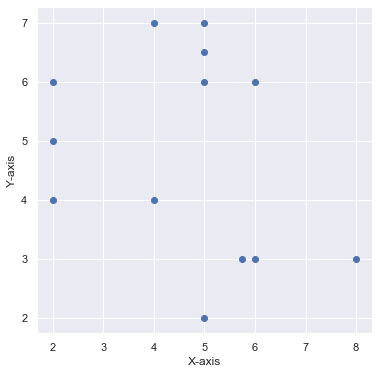

In [1176]:
Plot(X,y)

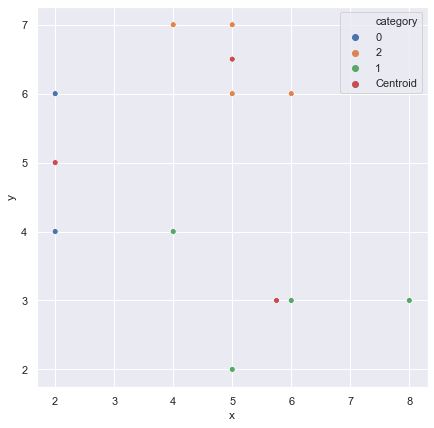

In [1178]:
clustered_df = pd.DataFrame()
clustered_df['x']=X
clustered_df['y']=y
clustered_df['category']=category
sns.scatterplot(data = clustered_df, x = 'x', y = 'y', hue = 'category')

# ML A4: Decision Tree

In [ ]:
fft